In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import neurokit2 as nk
import scipy.stats
from scipy.signal import find_peaks, peak_prominences

In [109]:
ibi_df = pd.read_csv(f'./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/002/IBI_002.csv')

In [110]:
ibi_df.head(30)

,datetime,ibi
0,2020-02-21 09:19:34.345047,0.781286
1,2020-02-21 09:19:35.204462,0.859414
2,2020-02-21 09:19:35.985748,0.781286
3,2020-02-21 09:19:47.408145,0.781286
4,2020-02-21 09:19:48.205057,0.796911
5,2020-02-21 09:19:49.033220,0.828163
6,2020-02-21 09:19:49.767628,0.734409
7,2020-02-21 09:19:50.767674,1.000046
8,2020-02-21 09:19:51.736469,0.968794
9,2020-02-21 09:19:52.580257,0.843789


In [111]:
ibi_df['datetime']=pd.to_datetime(ibi_df['datetime'])

In [112]:
ibi_resampled = ibi_df[(ibi_df['datetime'] >= ibi_df['datetime'].iloc[0]) & (ibi_df['datetime'] <= ibi_df['datetime'].iloc[-1])].set_index('datetime').resample('5Min').interpolate(method='time')

In [113]:
ibi_resampled.isna().sum()

 ibi    2344
dtype: int64

In [114]:
ibi_resampled[' ibi'] = ibi_resampled[' ibi'] * 1000 # 0.xx 초 -> 밀리초 단위로

In [115]:
ibi_resampled.head()

,ibi
datetime,
2020-02-21 09:15:00,NaN
2020-02-21 09:20:00,NaN
2020-02-21 09:25:00,NaN
2020-02-21 09:30:00,NaN
2020-02-21 09:35:00,NaN


In [116]:
# ibi_values = ibi_resampled[' ibi'].values

# maxHRV = ibi_resampled[' ibi'].max()
# minHRV = ibi_resampled[' ibi'].min()
# medianHRV = ibi_resampled[' ibi'].median()
# meanHRV = ibi_resampled[' ibi'].mean()
# sdnn = ibi_resampled[' ibi'].std()

# nn50 = 0.
# for i in range(len(ibi_resampled)-1):
#     if np.abs(ibi_resampled.iloc[i+1][' ibi'] - ibi_resampled.iloc[i][' ibi']) > 50:
#         nn50 +=1

# pnn50 = nn50/len(ibi_resampled)

# rmssd = 0.
# for i in range(len(ibi_resampled)-1):
#     rmssd = np.abs(ibi_resampled.iloc[i+1][' ibi'] - ibi_resampled.iloc[i][' ibi'])**2
# rmssd = np.sqrt(rmssd) / len(ibi_resampled)

# madHRV = np.abs(ibi_resampled[' ibi'] - meanHRV).mean()
# sdsd = np.std(ibi_resampled[' ibi'].diff())
# cvnn = meanHRV / sdnn
# cvsd = sdsd / meanHRV
# mcvnn = np.median(np.abs(ibi_resampled[' ibi'].diff().dropna() - np.median(ibi_resampled[' ibi'].diff().dropna())))
# iqrnn = np.percentile(ibi_resampled[' ibi'], 75) - np.percentile(ibi_resampled[' ibi'], 25)
# sdrmssd = sdnn / rmssd
# prc20nn = np.percentile(ibi_resampled[' ibi'], 20)
# prc80nn = np.percentile(ibi_resampled[' ibi'], 80)

# hist, bin_edges = np.histogram(ibi_resampled[' ibi'], bins='auto')

# tinn = bin_edges[-1] - bin_edges[0]
# hti = len(ibi_resampled) / max(hist)


In [117]:
'''
print(f'maxHRV : {maxHRV}')
print(f'minHRV : {minHRV}')
print(f'medianHRV : {medianHRV}')
print(f'meanHRV : {meanHRV}')
print(f'madHRV : {madHRV}')
print(f'SDNN : {sdnn}')
print(f'NN50 : {nn50}')
print(f'pNN50 : {pnn50}')
print(f'RMSSD : {rmssd}')
print(f'SDSD : {sdsd}')
print(f'CVNN : {cvnn}')
print(f'CVSD : {cvsd}')
print(f'MCVNN : {mcvnn}')
print(f'IQRNN : {iqrnn}')
print(f'SDRMSSD : {sdrmssd}')
print(f'Prc20NN : {prc20nn}')
print(f'Prc80NN : {prc80nn}')
print(f'TINN : {tinn}')
print(f'HTI : {hti}')
'''

"\nprint(f'maxHRV : {maxHRV}')\nprint(f'minHRV : {minHRV}')\nprint(f'medianHRV : {medianHRV}')\nprint(f'meanHRV : {meanHRV}')\nprint(f'madHRV : {madHRV}')\nprint(f'SDNN : {sdnn}')\nprint(f'NN50 : {nn50}')\nprint(f'pNN50 : {pnn50}')\nprint(f'RMSSD : {rmssd}')\nprint(f'SDSD : {sdsd}')\nprint(f'CVNN : {cvnn}')\nprint(f'CVSD : {cvsd}')\nprint(f'MCVNN : {mcvnn}')\nprint(f'IQRNN : {iqrnn}')\nprint(f'SDRMSSD : {sdrmssd}')\nprint(f'Prc20NN : {prc20nn}')\nprint(f'Prc80NN : {prc80nn}')\nprint(f'TINN : {tinn}')\nprint(f'HTI : {hti}')\n"

In [118]:
dg_df = pd.read_csv('./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/Demographics.csv')
dg_df.head(16)

,ID,Gender,HbA1c
0,13,MALE,5.7
1,1,FEMALE,5.5
2,3,FEMALE,5.9
3,4,FEMALE,6.4
4,5,FEMALE,5.7
5,2,MALE,5.6
6,6,FEMALE,5.8
7,7,FEMALE,5.3
8,8,FEMALE,5.6
9,10,FEMALE,6.0


In [119]:
###### ACC
# 가속도 벡터 magnitude 계산 함수
def calculate_mag(acc_x, acc_y, acc_z):
    acc_mag = np.sqrt(acc_x ** 2 + acc_y ** 2 + acc_z ** 2)
    return acc_mag

###### Activity bouts
def exercisepts(acc, hr, time): #acc and hr must be same length, acc must be magnitude
    """
        calculates activity bouts using accelerometry and heart rate
        Args:
            acc (pandas.DataFrame column or pandas series): accelerometry column
            hr (pandas.DataFrame column or pandas series): heart rate column
            time (pandas.DataFrame column or pandas series): time column
        Returns:
            countbouts (IntegerType): the number of acitvity bouts total
            returndf (pandas.DataFrame): a pandas dataframe with time and activity bouts (designated as a '1') to easily integrate with your data workflow
    """  
    
    exercisepoints = []
    for z in range(len(acc)):
        if acc.iloc[z] > np.mean(acc.iloc[0:z]):
            if hr.iloc[z] > np.mean(hr.iloc[0:z]):
                exercisepoints.append(1)
            else:
                exercisepoints.append(0)
        else:
            exercisepoints.append(0)
            
    returndf = pd.DataFrame()
    returndf['datetime'] = time
    returndf['Activity Bouts'] = exercisepoints
    
    countbouts = len(exercisepoints)
    return countbouts, returndf

###### EDA
def peak_eda(eda):
    peaks_idx, properties = find_peaks(eda, height=0, distance=4, prominence=0.3)
    peak_eda = len(peaks_idx)
    return peak_eda

'''
# rolling window에서 피크를 찾는 함수
def find_peaks_in_rolling_window(data, window_size):
    number_of_windows = 0
    peaks_in_window = 0
    for window_data in data.rolling(window=window_size):
        peaks, _ = find_peaks(window_data[' eda'], height=0, distance=4, prominence=0.3)
        if peaks.any():
            peaks_in_window += len(peaks)
        number_of_windows += 1
    return number_of_windows, peaks_in_window
'''

# PersHigh, PersLow, PersNorm 분류 함수
def classify_glucose(value, mean, std):
    if value > mean + std:
        return 'PersHigh'
    elif value < mean - std:
        return 'PersLow'
    else:
        return 'PersNorm'
    
###### IBI
def nn50(ibi):
    differences = abs(np.diff(ibi))
    n = np.sum(differences > 50)
    nn50 = round(n,1)
    return nn50

def pnn50(ibi):
    differences = abs(np.diff(ibi))
    n = np.sum(differences > 50)
    p=0
    if len(differences) != 0:
        p = (n / len(differences)) * 100
    pnn50 = round(p, 1)
    return pnn50

def rmssd(ibi):
    differences = abs(np.diff(ibi))
    rmssd = 0
    if len(differences) != 0:
        rmssd = np.sqrt(np.sum(np.square(differences)) / len(differences))
    rmssd = round(rmssd,1)
    return rmssd

def sdnn(ibi):
    if ibi.isnull().any():
        return np.nan
    #return round(np.sqrt(np.var(ibi, ddof=1)) * 10) / 10
    return round(np.sqrt(np.var(ibi, ddof=1)), 1)


## EXTENDED HRV FEATURES

def sdsd(ibi):
    if len(ibi) < 2:
        return np.nan
    return np.std(np.diff(ibi))

def cvnn(ibi):
    if len(ibi) == 0 or ibi.isnull().any() or sdnn(ibi) == 0 or np.isnan(sdnn(ibi)):
        return np.nan
    return np.mean(ibi) / sdnn(ibi)

def cvsd(ibi):
    if len(ibi) == 0 or ibi.isnull().any() or np.isnan(np.mean(ibi)):
        return np.nan
    return sdsd(ibi) / np.mean(ibi)

def mcvnn(ibi):
    if len(ibi) < 2 or ibi.isnull().any():
        return np.nan
    differences = abs(np.diff(ibi))
    return np.median(np.abs(differences - np.median(differences)))

def iqrnn(ibi):
    if len(ibi) == 0 or ibi.isnull().any():
        return np.nan
    return np.percentile(ibi, 75) - np.percentile(ibi, 25)

def sdrmssd(ibi):
    if len(ibi) == 0 or ibi.isnull().any() or rmssd(ibi) == 0 or np.isnan(rmssd(ibi)) or sdnn(ibi) == 0 or np.isnan(sdnn(ibi)):
        return np.nan
    return sdnn(ibi) / rmssd(ibi)

def prc20nn(ibi):
    if len(ibi) == 0:
        return np.nan
    return np.percentile(ibi, 20)

def prc80nn(ibi):
    if len(ibi) == 0:
        return np.nan
    return np.percentile(ibi, 80)

def tinn(ibi):
    if len(ibi) == 0:
        return np.nan
    hist, bin_edges = np.histogram(ibi, bins='auto')
    return bin_edges[-1] - bin_edges[0]

def hti(ibi):
    if len(ibi) == 0 or ibi.isnull().any():
        return np.nan
    hist, _ = np.histogram(ibi, bins='auto')
    if max(hist) == 0:
        return np.nan
    return max(hist)



###### circaidan rhythm
def crhythm(time, timeformat='%Y-%m-%d %H:%M:%S'):
    """
        computes 'minutes from midnight' and 'hours from midnight'- these features will allow you to account for circaidan rhythm effects
        Args:
             time (pandas.DataFrame): time column
             timeformat (String): default = '%Y-%m-%d %H:%M:%S.%f'; format of timestamp in time column
        Returns:
            hourfrommid (ListType): Hours from midnight, the same length as your time column
            minfrommid (ListType): Minutes from midnight, the same length as your time column

    """
    
    df = pd.DataFrame()
    df['Time'] =  pd.to_datetime(time, format=timeformat)
    df['Timefrommidnight'] =  df['Time'].dt.time
    hourfrommid=[]
    minfrommid=[]
    
    for i in range(0, len(df['Timefrommidnight'])):
        if pd.isna(df['Timefrommidnight'].iloc[i]):
            minfrommid.append(0)
            hourfrommid.append(0)
        else:
            minfrommid.append(int(df['Timefrommidnight'].iloc[i].strftime('%H:%M:%S')[0:2])*60 + int(df['Timefrommidnight'].iloc[i].strftime('%H:%M:%S')[3:5]) + round(int(df['Timefrommidnight'].iloc[i].strftime('%H:%M:%S')[6:9])/60))
            hourfrommid.append(round((int(df['Timefrommidnight'].iloc[i].strftime('%H:%M:%S')[0:2])*60 + int(df['Timefrommidnight'].iloc[i].strftime('%H:%M:%S')[3:5]) + round(int(df['Timefrommidnight'].iloc[i].strftime('%H:%M:%S')[6:9])/60))/60))

    return hourfrommid, minfrommid

'''
# Wake Time을 감지하는 함수를 정의합니다.
def detect_wake_time(data, threshold=0.04, post_wake_duration='75m', initial_check_duration='25m'):
    wake_times = pd.Series(0, index=data.index)
    
    for timestamp in data.index:
        if timestamp != data.index[0] and data.loc[timestamp, 'rolling_slope'] > threshold:
            #print(data.loc[timestamp, 'rolling_slope'])
            initial_check_end = timestamp + pd.Timedelta(initial_check_duration)
            post_wake_end = timestamp + pd.Timedelta(post_wake_duration)
            if data.loc[initial_check_end:post_wake_end, 'rolling_avg'].mean() > data.loc[timestamp, 'rolling_avg']:
                wake_times.loc[timestamp] = 1

    return wake_times
'''

def detect_wake_time(processed_data, short_window=25, long_window=75):
    # Identifying wake time
    wake_times = pd.Series(0, index=processed_data.index)
    unique_days = processed_data.index.normalize().unique()

    for day in unique_days:
        day_data = processed_data[processed_data.index.normalize() == day]
        if not day_data.empty:
            smoothed_binary = day_data['rolling_avg']
            start_time = day_data.index[0]
            end_time = day_data.index[-1]
            
            
            idx = 0
            current_time = day_data.index[idx]
            while current_time + pd.Timedelta(minutes=long_window) <= end_time:
                short_term_window_end = current_time +  pd.Timedelta(minutes=short_window)
                long_term_window_end = current_time +  pd.Timedelta(minutes=long_window)

                short_term_mean = smoothed_binary.loc[current_time:short_term_window_end].mean()
                long_term_mean = smoothed_binary.loc[short_term_window_end:long_term_window_end].mean()

                if short_term_mean < long_term_mean and all(smoothed_binary.loc[short_term_window_end:long_term_window_end] > 0.5):
                    wake_times.loc[current_time] = 1
                    #break

                idx += 1  # Move the window by one minute
                current_time = day_data.index[idx]

    return wake_times


In [120]:
def validate_daily_dfs(daily_dfs):
    diff_set = set()
    accset = set()
    edaset = set()
    hrset = set()
    ibiset = set()
    tempset = set()
    dexcomset = set()
    for idx in range(len(daily_dfs['acc'])):
        accset = accset.union(set(date.strftime("%Y-%m-%d") for date in daily_dfs['acc'][idx].index.date))
    for idx in range(len(daily_dfs['eda'])):
        edaset = edaset.union(set(date.strftime("%Y-%m-%d") for date in daily_dfs['eda'][idx].index.date))
    for idx in range(len(daily_dfs['hr'])):
        hrset = hrset.union(set(date.strftime("%Y-%m-%d") for date in daily_dfs['hr'][idx].index.date))
    for idx in range(len(daily_dfs['ibi'])):
        ibiset = ibiset.union(set(date.strftime("%Y-%m-%d") for date in daily_dfs['ibi'][idx].index.date))
    for idx in range(len(daily_dfs['temp'])):
        tempset = tempset.union(set(date.strftime("%Y-%m-%d") for date in daily_dfs['temp'][idx].index.date))
    for idx in range(len(daily_dfs['dexcom'])):
        dexcomset = dexcomset.union(set(date.strftime("%Y-%m-%d") for date in daily_dfs['dexcom'][idx].index.date))
    ## 차집합 연산 : 하나라도 예외적인 다른 날짜가 있다면 제외시켜야 함.
    diff_set = diff_set.union(dexcomset.difference(accset))
    diff_set = diff_set.union(dexcomset.difference(edaset))
    diff_set = diff_set.union(dexcomset.difference(hrset))
    diff_set = diff_set.union(dexcomset.difference(ibiset))
    diff_set = diff_set.union(dexcomset.difference(tempset))
    # print(diff_set)

    if len(diff_set) > 0:
        ## diffset의 date값을 갖고 있는 daily_dfs 딕셔너리 내 value 의 리스트 원소(데이터프레임)를 제거
        if len(diff_set & accset) > 0:
            indexes_to_remove = []
            for idx in range(len(daily_dfs['acc'])):
                for date in list(date.strftime("%Y-%m-%d") for date in daily_dfs['acc'][idx].index.date):
                    if date in diff_set:
                        indexes_to_remove.append(idx)
            ## 제거 대상을 제거한 리스트를 새로 할당
            daily_dfs['acc'] = [daily_dfs['acc'][i] for i in range(len(daily_dfs['acc'])) if i not in indexes_to_remove]

        if len(diff_set & edaset) > 0:
            indexes_to_remove = []
            for idx in range(len(daily_dfs['eda'])):
                for date in list(date.strftime("%Y-%m-%d") for date in daily_dfs['eda'][idx].index.date):
                    if date in diff_set:
                        indexes_to_remove.append(idx)
            ## 제거 대상을 제거한 리스트를 새로 할당
            daily_dfs['eda'] = [daily_dfs['eda'][i] for i in range(len(daily_dfs['eda'])) if i not in indexes_to_remove]

        if len(diff_set & hrset) > 0:
            indexes_to_remove = []
            for idx in range(len(daily_dfs['hr'])):
                for date in list(date.strftime("%Y-%m-%d") for date in daily_dfs['hr'][idx].index.date):
                    if date in diff_set:
                        indexes_to_remove.append(idx)
            ## 제거 대상을 제거한 리스트를 새로 할당
            daily_dfs['hr'] = [daily_dfs['hr'][i] for i in range(len(daily_dfs['hr'])) if i not in indexes_to_remove]

        if len(diff_set & ibiset) > 0:
            indexes_to_remove = []
            for idx in range(len(daily_dfs['ibi'])):
                for date in list(date.strftime("%Y-%m-%d") for date in daily_dfs['ibi'][idx].index.date):
                    if date in diff_set:
                        indexes_to_remove.append(idx)
            ## 제거 대상을 제거한 리스트를 새로 할당
            daily_dfs['ibi'] = [daily_dfs['ibi'][i] for i in range(len(daily_dfs['ibi'])) if i not in indexes_to_remove]

        if len(diff_set & tempset) > 0:
            indexes_to_remove = []
            for idx in range(len(daily_dfs['temp'])):
                for date in list(date.strftime("%Y-%m-%d") for date in daily_dfs['temp'][idx].index.date):
                    if date in diff_set:
                        indexes_to_remove.append(idx)
            ## 제거 대상을 제거한 리스트를 새로 할당
            daily_dfs['temp'] = [daily_dfs['temp'][i] for i in range(len(daily_dfs['temp'])) if i not in indexes_to_remove]
        
        if len(diff_set & dexcomset) > 0:
            indexes_to_remove = []
            for idx in range(len(daily_dfs['dexcom'])):
                for date in list(date.strftime("%Y-%m-%d") for date in daily_dfs['dexcom'][idx].index.date):
                    if date in diff_set:
                        indexes_to_remove.append(idx)
            ## 제거 대상을 제거한 리스트를 새로 할당
            daily_dfs['dexcom'] = [daily_dfs['dexcom'][i] for i in range(len(daily_dfs['dexcom'])) if i not in indexes_to_remove]

        return False, daily_dfs
    return True, daily_dfs

In [121]:
# 빈 DataFrame 생성
df = pd.DataFrame(columns=[
    'calories2hr',
    'protein2hr',
    'sugar2hr',
    'carbs2hr',
    'calories8hr',
    'protein8hr',
    'sugar8hr',
    'carbs8hr',
    'calories24hr',
    'protein24hr',
    'sugar24hr',
    'carbs24hr',
    'eat',
    'eatcnt2hr',
    'eatcnt8hr',
    'eatcnt24hr',
    'eatmean2hr',
    'eatmean8hr',
    'eatmean24hr',
    'acc_mean',
    'acc_std',
    'acc_min',
    'acc_max',
    'acc_q1g',
    'acc_q3g',
    'acc_skew',
    'acc_mean_2hrs',
    'acc_max_2hrs',
    'eda_mean',
    'eda_std',
    'eda_min',
    'eda_max',
    'eda_q1g',
    'eda_q3g',
    'eda_skew',
    'PeakEDA',
    'PeakEDA2hr_sum',
    'PeakEDA2hr_mean',
    'hr_mean',
    'hr_std',
    'hr_min',
    'hr_max',
    'hr_q1g',
    'hr_q3g',
    'hr_skew',
    'maxHRV',
    'minHRV',
    'medianHRV',
    'meanHRV',
    'SDNN',
    'NN50',
    'pNN50',
    'RMSSD',
    'SDSD',
    'CVNN',
    'CVSD',
    'MCVNN',
    # 'IQRNN',
    'SDRMSSD',
    # 'Prc20NN',
    # 'Prc80NN',
    'TINN',
    # 'HTI',
    'temp_mean',
    'temp_std',
    'temp_min',
    'temp_max',
    'temp_q1g',
    'temp_q3g',
    'temp_skew',
    'Activity_bouts',
    'Activity24',
    'Activity1hr',
    'Minfrommid',
    'Hourfrommid'
])

In [122]:
def validate_daily_dfs(daily_dfs):
    diff_set = set()
    accset = set()
    edaset = set()
    hrset = set()
    ibiset = set()
    tempset = set()
    dexcomset = set()
    for idx in range(len(daily_dfs['acc'])):
        accset = accset.union(set(date.strftime("%Y-%m-%d") for date in daily_dfs['acc'][idx].index.date))
    for idx in range(len(daily_dfs['eda'])):
        edaset = edaset.union(set(date.strftime("%Y-%m-%d") for date in daily_dfs['eda'][idx].index.date))
    for idx in range(len(daily_dfs['hr'])):
        hrset = hrset.union(set(date.strftime("%Y-%m-%d") for date in daily_dfs['hr'][idx].index.date))
    for idx in range(len(daily_dfs['ibi'])):
        ibiset = ibiset.union(set(date.strftime("%Y-%m-%d") for date in daily_dfs['ibi'][idx].index.date))
    for idx in range(len(daily_dfs['temp'])):
        tempset = tempset.union(set(date.strftime("%Y-%m-%d") for date in daily_dfs['temp'][idx].index.date))
    for idx in range(len(daily_dfs['dexcom'])):
        dexcomset = dexcomset.union(set(date.strftime("%Y-%m-%d") for date in daily_dfs['dexcom'][idx].index.date))
    ## 차집합 연산 : 하나라도 예외적인 다른 날짜가 있다면 제외시켜야 함.
    diff_set = diff_set.union(dexcomset.difference(accset))
    diff_set = diff_set.union(dexcomset.difference(edaset))
    diff_set = diff_set.union(dexcomset.difference(hrset))
    diff_set = diff_set.union(dexcomset.difference(ibiset))
    diff_set = diff_set.union(dexcomset.difference(tempset))
    # print(diff_set)

    if len(diff_set) > 0:
        ## diffset의 date값을 갖고 있는 daily_dfs 딕셔너리 내 value 의 리스트 원소(데이터프레임)를 제거
        if len(diff_set & accset) > 0:
            indexes_to_remove = []
            for idx in range(len(daily_dfs['acc'])):
                for date in list(date.strftime("%Y-%m-%d") for date in daily_dfs['acc'][idx].index.date):
                    if date in diff_set:
                        indexes_to_remove.append(idx)
            ## 제거 대상을 제거한 리스트를 새로 할당
            daily_dfs['acc'] = [daily_dfs['acc'][i] for i in range(len(daily_dfs['acc'])) if i not in indexes_to_remove]

        if len(diff_set & edaset) > 0:
            indexes_to_remove = []
            for idx in range(len(daily_dfs['eda'])):
                for date in list(date.strftime("%Y-%m-%d") for date in daily_dfs['eda'][idx].index.date):
                    if date in diff_set:
                        indexes_to_remove.append(idx)
            ## 제거 대상을 제거한 리스트를 새로 할당
            daily_dfs['eda'] = [daily_dfs['eda'][i] for i in range(len(daily_dfs['eda'])) if i not in indexes_to_remove]

        if len(diff_set & hrset) > 0:
            indexes_to_remove = []
            for idx in range(len(daily_dfs['hr'])):
                for date in list(date.strftime("%Y-%m-%d") for date in daily_dfs['hr'][idx].index.date):
                    if date in diff_set:
                        indexes_to_remove.append(idx)
            ## 제거 대상을 제거한 리스트를 새로 할당
            daily_dfs['hr'] = [daily_dfs['hr'][i] for i in range(len(daily_dfs['hr'])) if i not in indexes_to_remove]

        if len(diff_set & ibiset) > 0:
            indexes_to_remove = []
            for idx in range(len(daily_dfs['ibi'])):
                for date in list(date.strftime("%Y-%m-%d") for date in daily_dfs['ibi'][idx].index.date):
                    if date in diff_set:
                        indexes_to_remove.append(idx)
            ## 제거 대상을 제거한 리스트를 새로 할당
            daily_dfs['ibi'] = [daily_dfs['ibi'][i] for i in range(len(daily_dfs['ibi'])) if i not in indexes_to_remove]

        if len(diff_set & tempset) > 0:
            indexes_to_remove = []
            for idx in range(len(daily_dfs['temp'])):
                for date in list(date.strftime("%Y-%m-%d") for date in daily_dfs['temp'][idx].index.date):
                    if date in diff_set:
                        indexes_to_remove.append(idx)
            ## 제거 대상을 제거한 리스트를 새로 할당
            daily_dfs['temp'] = [daily_dfs['temp'][i] for i in range(len(daily_dfs['temp'])) if i not in indexes_to_remove]
        
        if len(diff_set & dexcomset) > 0:
            indexes_to_remove = []
            for idx in range(len(daily_dfs['dexcom'])):
                for date in list(date.strftime("%Y-%m-%d") for date in daily_dfs['dexcom'][idx].index.date):
                    if date in diff_set:
                        indexes_to_remove.append(idx)
            ## 제거 대상을 제거한 리스트를 새로 할당
            daily_dfs['dexcom'] = [daily_dfs['dexcom'][i] for i in range(len(daily_dfs['dexcom'])) if i not in indexes_to_remove]

        return False, daily_dfs
    return True, daily_dfs

In [123]:
ibimultiplier = 1000 # Transform ibi to milliseconds

In [124]:
for id in range(1, len(dg_df)+1):
    if id == 7: # Skip ID 7
        continue
    fl_df = pd.read_csv(f'./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/{id:03}/Food_Log_{id:03}.csv')
    acc_df = pd.read_csv(f'./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/{id:03}/ACC_{id:03}.csv')
    eda_df = pd.read_csv(f'./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/{id:03}/EDA_{id:03}.csv')
    #bvp_df = pd.read_csv(f'./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/{id:03}/BVP_{id:03}.csv')
    hr_df = pd.read_csv(f'./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/{id:03}/HR_{id:03}.csv')
    ibi_df = pd.read_csv(f'./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/{id:03}/IBI_{id:03}.csv')
    temp_df = pd.read_csv(f'./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/{id:03}/TEMP_{id:03}.csv')
    dexcom_df = pd.read_csv(f'./big-ideas-lab-glycemic-variability-and-wearable-device-data-1.1.2/{id:03}/Dexcom_{id:03}.csv')

    biological_sex = dg_df.loc[dg_df['ID'] == id, 'Gender'].values[0]
    hbA1c = dg_df.loc[dg_df['ID'] == id, 'HbA1c'].values[0]

    print(f'ID : {id}')

    ## datetime 변환 및 리샘플링 전처리
    ## Dexcom Gluecose
    dexcom_df.drop(dexcom_df.loc[:11].index, inplace=True)
    dexcom_df.rename(columns = {'Timestamp (YYYY-MM-DDThh:mm:ss)': 'datetime'}, inplace = True)
    dexcom_df.rename(columns = {'Glucose Value (mg/dL)': 'glucose'}, inplace = True)
    dexcom_df = dexcom_df[['datetime', 'glucose']]
    dexcom_df['datetime']=pd.to_datetime(dexcom_df['datetime'])
    dexcom_df.set_index('datetime', inplace=True)

    ## Food Log
    if id == 13:
        fl_df['time_begin']=pd.to_datetime(fl_df['time_begin'], format='%m/%d/%Y %H:%M')
    else:
        fl_df['time_begin']=pd.to_datetime(fl_df['time_begin'])
    fl_df.index = pd.DatetimeIndex(fl_df["time_begin"])
    fl_df = fl_df.sort_index()
    
    ## Accelerometer
    acc_df['datetime']=pd.to_datetime(acc_df['datetime'])
    acc_df['vector_mag'] = calculate_mag(acc_df[' acc_x'], acc_df[' acc_y'], acc_df[' acc_z'])
    acc_df.drop(columns=[' acc_x', ' acc_y', ' acc_z'], inplace=True)
    acc_resampled = pd.DataFrame()
    acc_resampled['ACC_Mean'] = acc_df.set_index('datetime')['vector_mag'].resample('5Min').mean().interpolate(method='time')
    acc_resampled['ACC_Std'] = acc_df.set_index('datetime')['vector_mag'].resample('5Min').std().interpolate(method='time')
    acc_resampled['ACC_Min'] = acc_df.set_index('datetime')['vector_mag'].resample('5Min').min().interpolate(method='time')
    acc_resampled['ACC_Max'] = acc_df.set_index('datetime')['vector_mag'].resample('5Min').max().interpolate(method='time')
    acc_resampled['ACC_Q1G'] = acc_df.set_index('datetime')['vector_mag'].resample('5Min').quantile(0.25).interpolate(method='time')
    acc_resampled['ACC_Q3G'] = acc_df.set_index('datetime')['vector_mag'].resample('5Min').quantile(0.75).interpolate(method='time')
    acc_resampled['ACC_Skew'] = acc_df.set_index('datetime')['vector_mag'].resample('5Min').apply(lambda x: x.skew()).interpolate(method='time')
    
    ## EDA
    eda_df['datetime']=pd.to_datetime(eda_df['datetime'])
    eda_resampled = pd.DataFrame()
    eda_resampled['EDA_Mean'] = eda_df.set_index('datetime')[' eda'].resample('5Min').mean().interpolate(method='time')
    eda_resampled['EDA_Std'] = eda_df.set_index('datetime')[' eda'].resample('5Min').std().interpolate(method='time')
    eda_resampled['EDA_Min'] = eda_df.set_index('datetime')[' eda'].resample('5Min').min().interpolate(method='time')
    eda_resampled['EDA_Max'] = eda_df.set_index('datetime')[' eda'].resample('5Min').max().interpolate(method='time')
    eda_resampled['EDA_Q1G'] = eda_df.set_index('datetime')[' eda'].resample('5Min').quantile(0.25).interpolate(method='time')
    eda_resampled['EDA_Q3G'] = eda_df.set_index('datetime')[' eda'].resample('5Min').quantile(0.75).interpolate(method='time')
    eda_resampled['EDA_Skew'] = eda_df.set_index('datetime')[' eda'].resample('5Min').apply(lambda eda: eda.skew()).interpolate(method='time')
    eda_resampled['peakEDA'] = eda_df.set_index('datetime')[' eda'].resample('5Min').apply(lambda eda: peak_eda(eda)).interpolate(method='time')
    ## Heart Rate
    if id == 1:
        hr_df['datetime']=pd.to_datetime(hr_df['datetime'], format='%m/%d/%y %H:%M')
    else:
        hr_df['datetime']=pd.to_datetime(hr_df['datetime'])
    hr_resampled = pd.DataFrame()
    hr_resampled['HR_Mean'] = hr_df.set_index('datetime')[' hr'].resample('5Min').mean().interpolate(method='time')
    hr_resampled['HR_Std'] = hr_df.set_index('datetime')[' hr'].resample('5Min').std().interpolate(method='time')
    hr_resampled['HR_Min'] = hr_df.set_index('datetime')[' hr'].resample('5Min').min().interpolate(method='time')
    hr_resampled['HR_Max'] = hr_df.set_index('datetime')[' hr'].resample('5Min').max().interpolate(method='time')
    hr_resampled['HR_Q1G'] = hr_df.set_index('datetime')[' hr'].resample('5Min').quantile(0.25).interpolate(method='time')
    hr_resampled['HR_Q3G'] = hr_df.set_index('datetime')[' hr'].resample('5Min').quantile(0.75).interpolate(method='time')
    hr_resampled['HR_Skew'] = hr_df.set_index('datetime')[' hr'].resample('5Min').apply(lambda hr: hr.skew()).interpolate(method='time')
    
    ## Temperature
    temp_df['datetime']=pd.to_datetime(temp_df['datetime'])
    temp_resampled = pd.DataFrame()
    temp_resampled['TEMP_Mean'] = temp_df.set_index('datetime')[' temp'].resample('5Min').mean().interpolate(method='time')
    temp_resampled['TEMP_Std'] = temp_df.set_index('datetime')[' temp'].resample('5Min').std().interpolate(method='time')
    temp_resampled['TEMP_Min'] = temp_df.set_index('datetime')[' temp'].resample('5Min').min().interpolate(method='time')
    temp_resampled['TEMP_Max'] = temp_df.set_index('datetime')[' temp'].resample('5Min').max().interpolate(method='time')
    temp_resampled['TEMP_Q1G'] = temp_df.set_index('datetime')[' temp'].resample('5Min').quantile(0.25).interpolate(method='time')
    temp_resampled['TEMP_Q3G'] = temp_df.set_index('datetime')[' temp'].resample('5Min').quantile(0.75).interpolate(method='time')
    temp_resampled['TEMP_Skew'] = temp_df.set_index('datetime')[' temp'].resample('5Min').apply(lambda temp: temp.skew()).interpolate(method='time')
    
    ## IBI
    ibi_df['datetime']=pd.to_datetime(ibi_df['datetime'])
    #ibi_df[' ibi'] = ibi_df[' ibi'].interpolate(method='time')
    ibi_df[' ibi'] = ibi_df[' ibi'] * ibimultiplier # 초 -> 밀리초 단위로
    #ibi_resampled = ibi_df.set_index('datetime').resample('5Min').first().interpolate(method='time')
    ibi_resampled = pd.DataFrame()
    ibi_resampled['minHRV'] = ibi_df.set_index('datetime')[' ibi'].resample('5Min').min().interpolate(method='time')
    ibi_resampled['maxHRV'] = ibi_df.set_index('datetime')[' ibi'].resample('5Min').max().interpolate(method='time')
    ibi_resampled['medianHRV'] = ibi_df.set_index('datetime')[' ibi'].resample('5Min').median().interpolate(method='time')
    ibi_resampled['meanHRV'] = ibi_df.set_index('datetime')[' ibi'].resample('5Min').mean().interpolate(method='time')
    ibi_resampled['SDNN'] = ibi_df.set_index('datetime')[' ibi'].resample('5Min').apply(lambda ibi: sdnn(ibi)).interpolate(method='time')
    ibi_resampled['NN50'] = ibi_df.set_index('datetime')[' ibi'].resample('5Min').apply(lambda ibi: nn50(ibi)).interpolate(method='time')
    ibi_resampled['pNN50'] = ibi_df.set_index('datetime')[' ibi'].resample('5Min').apply(lambda ibi: pnn50(ibi)).interpolate(method='time')
    ibi_resampled['RMSSD'] = ibi_df.set_index('datetime')[' ibi'].resample('5Min').apply(lambda ibi: rmssd(ibi)).interpolate(method='time')
    
    ibi_resampled['SDSD'] = ibi_df.set_index('datetime')[' ibi'].resample('5Min').apply(lambda ibi: sdsd(ibi)).interpolate(method='time')
    ibi_resampled['CVNN'] = ibi_df.set_index('datetime')[' ibi'].resample('5Min').apply(lambda ibi: cvnn(ibi)).interpolate(method='time')
    ibi_resampled['CVSD'] = ibi_df.set_index('datetime')[' ibi'].resample('5Min').apply(lambda ibi: cvsd(ibi)).interpolate(method='time')
    ibi_resampled['MCVNN'] = ibi_df.set_index('datetime')[' ibi'].resample('5Min').apply(lambda ibi: mcvnn(ibi)).interpolate(method='time')
    # ibi_resampled['IQRNN'] = ibi_df.set_index('datetime')[' ibi'].resample('5Min').apply(lambda ibi: iqrnn(ibi)).interpolate(method='time')
    ibi_resampled['SDRMSSD'] = ibi_df.set_index('datetime')[' ibi'].resample('5Min').apply(lambda ibi: sdrmssd(ibi)).interpolate(method='time')
    #ibi_resampled['Prc20NN'] = ibi_df.set_index('datetime')[' ibi'].resample('5Min').apply(lambda ibi: prc20nn(ibi)).interpolate(method='time')
    #ibi_resampled['Prc80NN'] = ibi_df.set_index('datetime')[' ibi'].resample('5Min').apply(lambda ibi: prc80nn(ibi)).interpolate(method='time')
    ibi_resampled['TINN'] = ibi_df.set_index('datetime')[' ibi'].resample('5Min').apply(lambda ibi: tinn(ibi)).interpolate(method='time')
    #ibi_resampled['HTI'] = ibi_df.set_index('datetime')[' ibi'].resample('5Min').apply(lambda ibi: hti(ibi)).interpolate(method='time')

    ## 날짜를 기준으로 데이터프레임을 분할하여 리스트에 저장
    daily_dfs = {'fl':[], 'acc':[], 'eda':[], 'hr':[], 'ibi':[], 'temp':[], 'bvp':[], 'dexcom':[]}
    for name, group in dexcom_df.groupby(dexcom_df.index.date):
        daily_dfs['dexcom'].append(group)
    for name, group in fl_df.groupby(fl_df['time_begin'].dt.date):
        daily_dfs['fl'].append(group)
    for name, group in acc_resampled.groupby(acc_resampled.index.date):
        daily_dfs['acc'].append(group)
    for name, group in eda_resampled.groupby(eda_resampled.index.date):
        daily_dfs['eda'].append(group)
    for name, group in hr_resampled.groupby(hr_resampled.index.date):
        daily_dfs['hr'].append(group)
    for name, group in ibi_resampled.groupby(ibi_resampled.index.date):
        daily_dfs['ibi'].append(group)
    for name, group in temp_resampled.groupby(temp_resampled.index.date):
        daily_dfs['temp'].append(group)

    isok, daily_dfs = validate_daily_dfs(daily_dfs=daily_dfs)
    if isok == False:
        print(f'daily_dfs is modified...')
        
    base_df = pd.concat(daily_dfs['dexcom'])
    
    ## *_df 이름의 데이터프레임으로 리뉴얼

    acc_df.drop(acc_df.index, inplace=True)
    eda_df.drop(eda_df.index, inplace=True)
    hr_df.drop(hr_df.index, inplace=True)
    ibi_df.drop(ibi_df.index, inplace=True)
    temp_df.drop(temp_df.index, inplace=True)

    if len(daily_dfs['acc']) > 0:
        acc_df = pd.concat(daily_dfs['acc'])
    if len(daily_dfs['eda']) > 0:
        eda_df = pd.concat(daily_dfs['eda'])
    if len(daily_dfs['hr']) > 0:   
        hr_df = pd.concat(daily_dfs['hr'])
    if len(daily_dfs['ibi']) > 0:
        ibi_df = pd.concat(daily_dfs['ibi'])
    if len(daily_dfs['temp']) > 0:
        temp_df = pd.concat(daily_dfs['temp'])
    
    ###### activitybouts
    print(f'len acc == hr : {len(acc_df) == len(hr_df)}')
    if len(acc_df) != len(hr_df):
        print(f"acc : {acc_df.index[0].strftime('%Y-%m-%d %H:%M:%S')} ~ {acc_df.index[-1].strftime('%Y-%m-%d %H:%M:%S')} : {len(acc_df)}")
        print(f"hr : {hr_df.index[0].strftime('%Y-%m-%d %H:%M:%S')} ~ {hr_df.index[-1].strftime('%Y-%m-%d %H:%M:%S')} : {len(hr_df)}")
        # Get the intersection of the indices
        common_index = acc_df.index.intersection(hr_df.index)
        # Filter both dataframes to only include the common indices
        acc_df = acc_df.loc[common_index]
        hr_df = hr_df.loc[common_index]
        print(f'After preprocessing-> len acc == hr : {len(acc_df) == len(hr_df)}')

    resultlen , returndf = exercisepts(acc_df['ACC_Mean'], hr_df['HR_Mean'], acc_df.index)
    acc_df['Activity_bouts'] = returndf['Activity Bouts'].values


    ## 윈도우 크기 설정
    window_size = '24h'

    ## 각 타임스탬프에 대해 24시간 롤링 윈도우를 계산
    for timestamp in base_df.index:
        window_start = timestamp - pd.Timedelta(window_size)
        window_end = timestamp 
        
        if window_start < base_df.index[0]:
            continue

        # df_glucose의 롤링 윈도우 범위 내의 데이터 선택
        glucose_window = base_df.loc[window_start:window_end]
        # df_other의 동일한 범위 내의 데이터 선택
        fl_window = fl_df.loc[window_start:window_end]# - pd.Timedelta('5m')]
        acc_window = acc_df.loc[window_start:window_end]# - pd.Timedelta('5m')]
        eda_window = eda_df.loc[window_start:window_end]# - pd.Timedelta('5m')]
        hr_window = hr_df.loc[window_start:window_end]# - pd.Timedelta('5m')]
        ibi_window = ibi_df.loc[window_start:window_end]# - pd.Timedelta('5m')]
        temp_window = temp_df.loc[window_start:window_end]# - pd.Timedelta('5m')]


        ##### Wake Time
        # 1. 현재 값이 Historical 평균보다 작은지 확인
        '''
        hr_historical = hr_window
        acc_historical = acc_window
        hr_mean_avg = hr_historical['HR_Mean'].mean()
        hr_std_avg = hr_historical['HR_Std'].mean()
        acc_mean_avg = acc_historical['ACC_Mean'].mean()
        acc_std_avg = acc_historical['ACC_Std'].mean()
        '''
        specific_date = timestamp.date()

        # 해당 날짜의 데이터 필터링 및 평균 계산
        hr_daily = hr_df[hr_df.index.date == specific_date]
        acc_daily = acc_df[hr_df.index.date == specific_date]
        
        hr_mean_avg = hr_daily.loc[:window_end]['HR_Mean'].mean()
        hr_std_avg = hr_daily.loc[:window_end]['HR_Std'].mean()
        acc_mean_avg = acc_daily.loc[:window_end]['ACC_Mean'].mean()
        acc_std_avg = acc_daily.loc[:window_end]['ACC_Std'].mean()
        
        base_df.loc[window_end, 'points'] = (
            (hr_window.iloc[-1]['HR_Mean'] < hr_mean_avg).astype(int) +
            (hr_window.iloc[-1]['HR_Std'] < hr_std_avg).astype(int) +
            (acc_window.iloc[-1]['ACC_Mean'] < acc_mean_avg).astype(int) +
            (acc_window.iloc[-1]['ACC_Std'] < acc_std_avg).astype(int)
        )

        # 2. 점수가 2보다 크면 이진 값을 할당합니다.
        base_df.loc[window_end, 'binary'] = (base_df.loc[window_end, 'points'] < 2).astype(int)

        # 3시간 동안의 데이터를 이동 평균(rolling)으로 계산합니다.
        # 데이터가 5분 간격이라고 가정하면, 3시간은 36 interval입니다.
        rolling_window3hr = base_df.loc[window_end - pd.Timedelta('3hr'):window_end]
        base_df.loc[window_end, 'rolling_avg'] = rolling_window3hr['binary'].mean()
                

        ##### fl

        calories2hr = 0.
        protein2hr = 0.
        sugar2hr = 0.
        carbs2hr = 0.
        calories8hr = 0.
        protein8hr = 0.
        sugar8hr = 0.
        carbs8hr = 0.
        calories24hr = 0.
        protein24hr = 0.
        sugar24hr = 0.
        carbs24hr = 0.
        
        flwindow5min = fl_window[window_end - pd.Timedelta('5m') : window_end]# - pd.Timedelta('5m')]
        flwindow2hr = fl_window[window_end - pd.Timedelta('2h') : window_end]# - pd.Timedelta('5m')]
        flwindow8hr = fl_window[window_end - pd.Timedelta('8h') : window_end]# - pd.Timedelta('5m')]
        flwindow24hr = fl_window[window_end - pd.Timedelta('24h') : window_end]# - pd.Timedelta('5m')]

        eat = 0
        if len(flwindow5min) > 0:
            eat = 1
        eatcnt2hr = len(flwindow2hr)
        eatcnt8hr = len(flwindow8hr)
        eatcnt24hr = len(flwindow24hr)

        eatmean2hr = eatcnt2hr / (2 * 60 / 5)  # 2시간 동안 5분 간격으로 나눈 시간 간격 수
        eatmean8hr = eatcnt8hr / (8 * 60 / 5)  # 8시간 동안 5분 간격으로 나눈 시간 간격 수
        eatmean24hr = eatcnt24hr / (24 * 60 / 5)  # 24시간 동안 5분 간격으로 나눈 시간 간격 수
        
        calories2hr = flwindow2hr['calorie'].values.sum()
        protein2hr = flwindow2hr['protein'].values.sum()
        sugar2hr = flwindow2hr['sugar'].values.sum()
        carbs2hr = flwindow2hr['total_carb'].values.sum()
        
        calories8hr = flwindow8hr['calorie'].values.sum()
        protein8hr = flwindow8hr['protein'].values.sum()
        sugar8hr = flwindow8hr['sugar'].values.sum()
        carbs8hr = flwindow8hr['total_carb'].values.sum()
        
        calories24hr = fl_window['calorie'].values.sum()
        protein24hr = fl_window['protein'].values.sum()
        sugar24hr = fl_window['sugar'].values.sum()
        carbs24hr = fl_window['total_carb'].values.sum()
        
        #print(f"window : [{(window_end - pd.Timedelta('24h')).strftime('%Y-%m-%d %H:%M:%S')} ~ {(window_end - pd.Timedelta('5m')).strftime('%Y-%m-%d %H:%M:%S')}]")
        #print(f"[{window24hr.index[0].strftime('%Y-%m-%d %H:%M:%S')} ~ {window24hr.index[-1].strftime('%Y-%m-%d %H:%M:%S')}] ID: {id}, sugar24hr: {sugar24hr}, glucose: {base_df.loc[window_end, 'glucose']}")

        ###### acc
        accwindow2hr = acc_window[window_end - pd.Timedelta('2h') : window_end]# - pd.Timedelta('5m')]
        accwindow1hr = acc_window[window_end - pd.Timedelta('1h') : window_end]# - pd.Timedelta('5m')]

        acc_mean_2hrs = accwindow2hr['ACC_Mean'].values.mean()
        acc_max_2hrs = accwindow2hr['ACC_Max'].values.max()

        activity24 = acc_window['Activity_bouts'].values.mean()
        activity1hr = accwindow1hr['Activity_bouts'].values.sum()

        ###### eda

        # peak detection
        edawindow2hr = eda_window[window_end - pd.Timedelta('2h') : window_end]# - pd.Timedelta('5m')]

        peakEDA2hr_sum = edawindow2hr['peakEDA'].values.sum()
        peakEDA2hr_mean = edawindow2hr['peakEDA'].values.mean()

        ##### results
        #print(f"(end of window): {window_end}, glucose: {glucose_window['glucose']}, sugar24hr: {sugar24hr}")
        # df_glucose의 개인화된 평균 및 표준 편차 계산 -> Class를 나누는 값 계산
        #print(f"[{window_start.strftime('%Y-%m-%d %H:%M:%S')} ~ {window_end.strftime('%Y-%m-%d %H:%M:%S')}] ID: {id}, sugar24hr: {sugar24hr}, glucose: {base_df.loc[window_end, 'glucose']}")
        base_df.loc[window_end, 'datetime'] = window_end.strftime('%Y-%m-%d %H:%M:%S')
        base_df.loc[window_end, 'personalMean'] = glucose_window['glucose'].mean()
        base_df.loc[window_end, 'personalStd'] = glucose_window['glucose'].std()
        base_df.loc[window_end, 'ID']=id
        base_df.loc[window_end, 'HbA1c']=hbA1c
        base_df.loc[window_end, 'Biological Sex']=biological_sex
        base_df.loc[window_end, 'calories2hr']=round(calories2hr,2)
        base_df.loc[window_end, 'protein2hr']=round(protein2hr,2)
        base_df.loc[window_end, 'sugar2hr']=round(sugar2hr,2)
        base_df.loc[window_end, 'carbs2hr']=round(carbs2hr,2)
        base_df.loc[window_end, 'calories8hr']=round(calories8hr,2)
        base_df.loc[window_end, 'protein8hr']=round(protein8hr,2)
        base_df.loc[window_end, 'sugar8hr']=round(sugar8hr,2)
        base_df.loc[window_end, 'carbs8hr']=round(carbs8hr,2)
        base_df.loc[window_end, 'calories24hr']=round(calories24hr,2)
        base_df.loc[window_end, 'protein24hr']=round(protein24hr,2)
        base_df.loc[window_end, 'sugar24hr']=round(sugar24hr,2)
        base_df.loc[window_end, 'carbs24hr']=round(carbs24hr,2)
        base_df.loc[window_end, 'eat']=eat
        base_df.loc[window_end, 'eatcnt2hr']=eatcnt2hr
        base_df.loc[window_end, 'eatcnt8hr']=eatcnt8hr
        base_df.loc[window_end, 'eatcnt24hr']=eatcnt24hr
        base_df.loc[window_end, 'eatmean2hr']=eatmean2hr
        base_df.loc[window_end, 'eatmean8hr']=eatmean8hr
        base_df.loc[window_end, 'eatmean24hr']=eatmean24hr
        base_df.loc[window_end, 'acc_mean']=round(acc_window.iloc[-1]['ACC_Mean'],2)
        base_df.loc[window_end, 'acc_std']=round(acc_window.iloc[-1]['ACC_Std'],2)
        base_df.loc[window_end, 'acc_min']=round(acc_window.iloc[-1]['ACC_Min'],2)
        base_df.loc[window_end, 'acc_max']=round(acc_window.iloc[-1]['ACC_Max'],2)
        base_df.loc[window_end, 'acc_q1g']=round(acc_window.iloc[-1]['ACC_Q1G'],2)
        base_df.loc[window_end, 'acc_q3g']=round(acc_window.iloc[-1]['ACC_Q3G'],2)
        base_df.loc[window_end, 'acc_skew']=round(acc_window.iloc[-1]['ACC_Skew'],2)
        base_df.loc[window_end, 'acc_mean_2hrs']=round(acc_mean_2hrs,2)
        base_df.loc[window_end, 'acc_max_2hrs']=round(acc_max_2hrs,2)
        base_df.loc[window_end, 'eda_mean']=round(eda_window.iloc[-1]['EDA_Mean'],2)
        base_df.loc[window_end, 'eda_std']=round(eda_window.iloc[-1]['EDA_Std'],2)
        base_df.loc[window_end, 'eda_min']=round(eda_window.iloc[-1]['EDA_Min'],2)
        base_df.loc[window_end, 'eda_max']=round(eda_window.iloc[-1]['EDA_Max'],2)
        base_df.loc[window_end, 'eda_q1g']=round(eda_window.iloc[-1]['EDA_Q1G'],2)
        base_df.loc[window_end, 'eda_q3g']=round(eda_window.iloc[-1]['EDA_Q3G'],2)
        base_df.loc[window_end, 'eda_skew']=round(eda_window.iloc[-1]['EDA_Skew'],2)
        base_df.loc[window_end, 'PeakEDA']=eda_window.iloc[-1]['peakEDA']
        base_df.loc[window_end, 'PeakEDA2hr_sum']=round(peakEDA2hr_sum,2)
        base_df.loc[window_end, 'PeakEDA2hr_mean']=round(peakEDA2hr_mean,2)
        base_df.loc[window_end, 'hr_mean']=round(hr_window.iloc[-1]['HR_Mean'],2)
        base_df.loc[window_end, 'hr_std']=round(hr_window.iloc[-1]['HR_Std'],2)
        base_df.loc[window_end, 'hr_min']=round(hr_window.iloc[-1]['HR_Min'],2)
        base_df.loc[window_end, 'hr_max']=round(hr_window.iloc[-1]['HR_Max'],2)
        base_df.loc[window_end, 'hr_q1g']=round(hr_window.iloc[-1]['HR_Q1G'],2)
        base_df.loc[window_end, 'hr_q3g']=round(hr_window.iloc[-1]['HR_Q3G'],2)
        base_df.loc[window_end, 'hr_skew']=round(hr_window.iloc[-1]['HR_Skew'],2)
        base_df.loc[window_end, 'maxHRV']=round(ibi_window.iloc[-1]['maxHRV'],2)
        base_df.loc[window_end, 'minHRV']=round(ibi_window.iloc[-1]['minHRV'],2)
        base_df.loc[window_end, 'medianHRV']=round(ibi_window.iloc[-1]['medianHRV'],2)
        base_df.loc[window_end, 'meanHRV']=round(ibi_window.iloc[-1]['meanHRV'],2)
        base_df.loc[window_end, 'SDNN']=round(ibi_window.iloc[-1]['SDNN'],2)
        base_df.loc[window_end, 'NN50']=round(ibi_window.iloc[-1]['NN50'],2)
        base_df.loc[window_end, 'pNN50']=round(ibi_window.iloc[-1]['pNN50'],2)
        base_df.loc[window_end, 'RMSSD']=round(ibi_window.iloc[-1]['RMSSD'],2)
        base_df.loc[window_end, 'SDSD']=round(ibi_window.iloc[-1]['SDSD'],2)
        base_df.loc[window_end, 'CVNN']=round(ibi_window.iloc[-1]['CVNN'],2)
        base_df.loc[window_end, 'CVSD']=round(ibi_window.iloc[-1]['CVSD'],2)
        base_df.loc[window_end, 'MCVNN']=round(ibi_window.iloc[-1]['MCVNN'],2)
        base_df.loc[window_end, 'SDRMSSD']=round(ibi_window.iloc[-1]['SDRMSSD'],2)
        base_df.loc[window_end, 'TINN']=round(ibi_window.iloc[-1]['TINN'],2)
        base_df.loc[window_end, 'temp_mean']=round(temp_window.iloc[-1]['TEMP_Mean'],2)
        base_df.loc[window_end, 'temp_std']=round(temp_window.iloc[-1]['TEMP_Std'],2)
        base_df.loc[window_end, 'temp_min']=round(temp_window.iloc[-1]['TEMP_Min'],2)
        base_df.loc[window_end, 'temp_max']=round(temp_window.iloc[-1]['TEMP_Max'],2)
        base_df.loc[window_end, 'temp_q1g']=round(temp_window.iloc[-1]['TEMP_Q1G'],2)
        base_df.loc[window_end, 'temp_q3g']=round(temp_window.iloc[-1]['TEMP_Q3G'],2)
        base_df.loc[window_end, 'temp_skew']=round(temp_window.iloc[-1]['TEMP_Skew'],2)
        base_df.loc[window_end, 'Activity_bouts']=acc_window.iloc[-1]['Activity_bouts']
        base_df.loc[window_end, 'Activity24']=activity24
        base_df.loc[window_end, 'Activity1hr']=activity1hr


    ###### crhythm
    hrfrommid, minfrommid = crhythm(base_df['datetime'])
    base_df['Minfrommid'] = minfrommid
    base_df['Hourfrommid'] = hrfrommid


    # rolling average의 기울기(slope)를 계산합니다.
    base_df['rolling_slope'] = base_df['rolling_avg'].diff()
    # 4. 'WakeTime' 칼럼에 값을 저장합니다.
    base_df['WakeTime'] = detect_wake_time(base_df)

    # WakeTime을 확인하기 위한 출력
    wake_time_indices = base_df[base_df['WakeTime'] == 1].index.strftime('%Y-%m-%d %H:%M:%S')
    wake_times_str = ', '.join(map(str, wake_time_indices))
    # print(wake_times_str)

    ###### 각 측정값을 PersHigh, PersLow, PersNorm으로 분류
    base_df['label'] = base_df.apply(
        lambda row: classify_glucose(row['glucose'], row['personalMean'], row['personalStd']), axis=1
    )

    base_df.drop(columns = ['points', 'binary', 'rolling_slope', 'rolling_avg'], inplace = True)
    base_df.drop(columns=['personalMean', 'personalStd'], inplace=True)

    df = pd.concat([df, base_df], ignore_index=True)
    

ID : 1
len acc == hr : True
ID : 2
len acc == hr : True
ID : 3
len acc == hr : True
ID : 4
len acc == hr : True
ID : 5
len acc == hr : True
ID : 6
len acc == hr : True
ID : 8
len acc == hr : True
ID : 9
len acc == hr : True
ID : 10
len acc == hr : True
ID : 11
len acc == hr : False
acc : 2020-04-06 08:20:00 ~ 2020-04-16 10:10:00 : 2903
hr : 2020-04-06 08:25:00 ~ 2020-04-16 10:10:00 : 2902
After preprocessing-> len acc == hr : True
ID : 12
len acc == hr : True
ID : 13
len acc == hr : True
ID : 14
daily_dfs is modified...
len acc == hr : True
ID : 15
daily_dfs is modified...
len acc == hr : True
ID : 16
daily_dfs is modified...
len acc == hr : True


In [125]:
print(len(df))

34165


In [126]:
df.isna().sum()

calories2hr       4103
protein2hr        4650
sugar2hr          4103
carbs2hr          4103
calories8hr       4103
                  ... 
ID                4103
HbA1c             4103
Biological Sex    4103
WakeTime             0
label                0
Length: 78, dtype: int64

In [127]:
df[['SDSD',
    'CVNN',
    'MCVNN',
    'SDRMSSD',
    'TINN']].isna().sum()

SDSD       4103
CVNN       4103
MCVNN      4103
SDRMSSD    4103
TINN       4103
dtype: int64

In [128]:
df[['SDSD',
    'CVNN',
    'MCVNN',
    'SDRMSSD',
    'TINN']].tail(30)

,SDSD,CVNN,MCVNN,SDRMSSD,TINN
34135,85.66,8.92,31.25,0.77,328.14
34136,102.92,6.51,46.88,0.86,390.64
34137,55.92,12.95,15.63,0.91,421.89
34138,60.17,17.31,15.63,0.68,328.14
34139,50.85,17.47,15.63,0.81,296.89
34140,48.12,10.14,23.44,1.45,281.26
34141,60.72,10.20,15.63,1.07,375.02
34142,46.06,14.51,15.63,1.11,281.26
34143,67.52,14.49,15.63,0.77,406.27
34144,31.09,26.01,15.62,0.99,234.39


In [129]:
df = df.dropna().reset_index(drop=True)

In [130]:
df.isna().sum()

calories2hr       0
protein2hr        0
sugar2hr          0
carbs2hr          0
calories8hr       0
                 ..
ID                0
HbA1c             0
Biological Sex    0
WakeTime          0
label             0
Length: 78, dtype: int64

In [131]:
df.to_csv(r'./features.csv', sep='\t', encoding='utf-8', header='true')

In [132]:
df = pd.read_csv(r'./features.csv', sep='\t', encoding='utf-8')

In [133]:
df = df.dropna().drop(columns=['Unnamed: 0']).reset_index(drop=True)

In [134]:
df['Biological Sex'] = df['Biological Sex'].map({'FEMALE': 0, 'MALE': 1})

In [135]:
df['label'] = df['label'].map({'PersLow': 0, 'PersNorm': 1, 'PersHigh':2})

In [136]:
corrdf = df.drop(columns=['datetime']).corr()

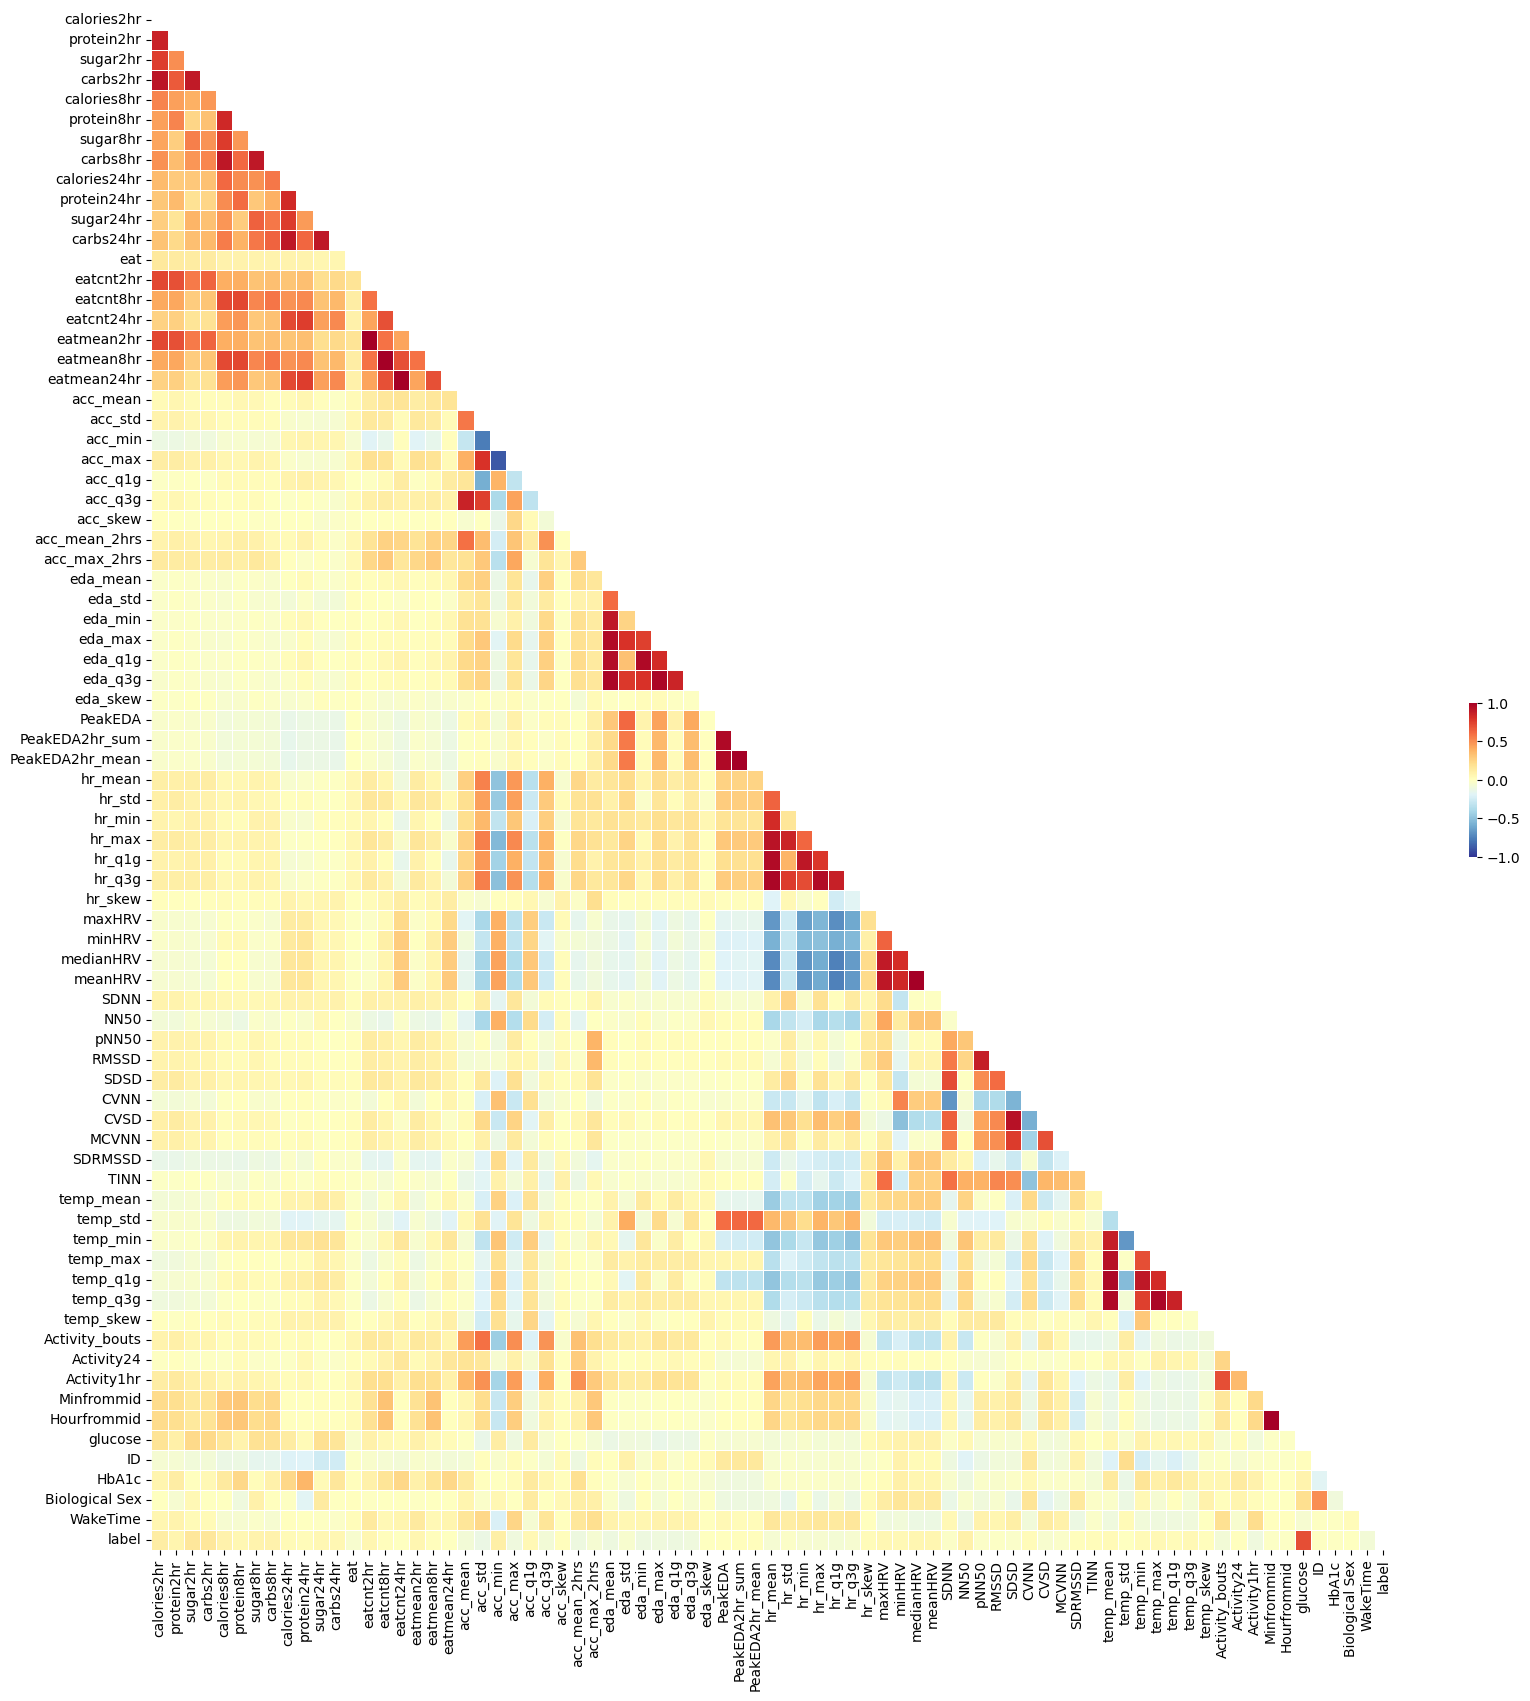

In [137]:
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(20,20) )

mask = np.zeros_like(corrdf)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(corrdf, 
            cmap = 'RdYlBu_r', 
            annot = False,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .1},# 컬러바 크기 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()